## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2-Hidden Layers





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 464)               364240    
_________________________________________________________________
batch_normalization_1 (Batch (None, 464)               1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 464)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 184)               85560     
_________________________________________________________________
batch_normalization_2 (Batch (None, 184)               736       
_________________________________________________________________
dropout_2 (Dropout)          (None, 184)               0         


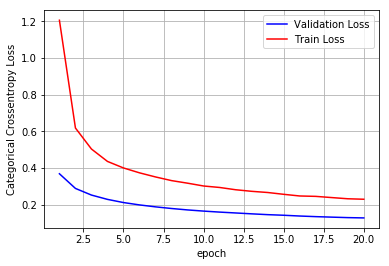

In [11]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

model_2 = Sequential()

model_2.add(Dense(464, activation='relu', input_dim=784, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(184, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None))) 
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(10, activation='softmax'))


model_2.summary()

model_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, Y_train, batch_size=256, epochs=20, verbose=1, validation_data=(X_test, Y_test))


score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model_2.get_weights()
for i in range (0,len(w_after)):
  print(i,w_after[i].shape)

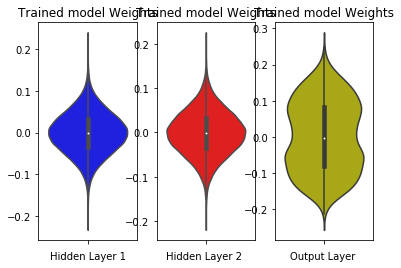

In [12]:
w_after = model_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 660)               518100    
_________________________________________________________________
batch_normalization_3 (Batch (None, 660)               2640      
_________________________________________________________________
dense_5 (Dense)              (None, 240)               158640    
_________________________________________________________________
batch_normalization_4 (Batch (None, 240)               960       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2410      
Total params: 682,750
Trainable params: 680,950
Non-trainable params: 1,800
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s

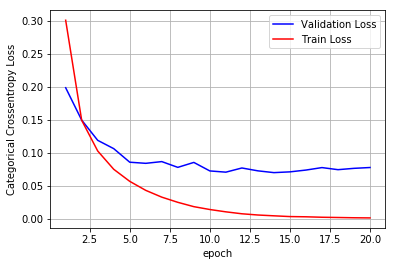

In [13]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import glorot_normal

model_2 = Sequential()

model_2.add(Dense(660, activation='sigmoid', input_dim=784, kernel_initializer=glorot_normal(seed=None)))
model_2.add(BatchNormalization())


model_2.add(Dense(240, activation='sigmoid', kernel_initializer=glorot_normal(seed=None))) 
model_2.add(BatchNormalization())


model_2.add(Dense(10, activation='softmax'))


model_2.summary()

model_2.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, Y_train, batch_size=256, epochs=20, verbose=1, validation_data=(X_test, Y_test))


score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model_2.get_weights()
for i in range (0,len(w_after)):
  print(i,w_after[i].shape)

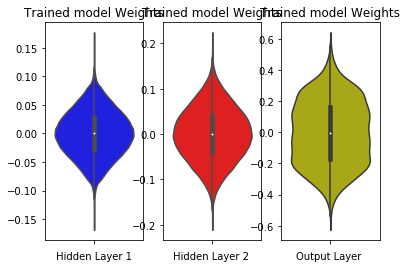

In [14]:
w_after = model_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 320)               251200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 80)                25680     
_________________________________________________________________
dropout_4 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                810       
Total params: 277,690
Trainable params: 277,690
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37u

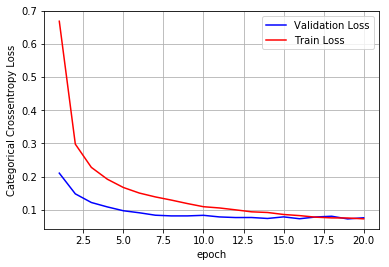

In [15]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

model_2 = Sequential()

model_2.add(Dense(320, activation='relu', input_dim=784, kernel_initializer=he_normal(seed=None)))

model_2.add(Dropout(0.5))

model_2.add(Dense(80, activation='relu', kernel_initializer=he_normal(seed=None))) 

model_2.add(Dropout(0.5))

model_2.add(Dense(10, activation='softmax'))


model_2.summary()

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, Y_train, batch_size=256, epochs=20, verbose=1, validation_data=(X_test, Y_test))


score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model_2.get_weights()
for i in range (0,len(w_after)):
  print(i,w_after[i].shape)

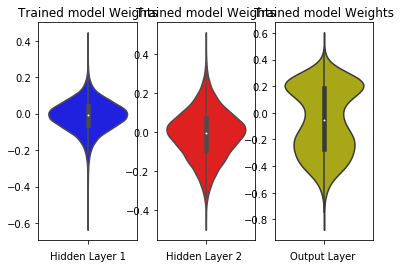

In [16]:
w_after = model_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 712)               558920    
_________________________________________________________________
dense_11 (Dense)             (None, 360)               256680    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                3610      
Total params: 819,210
Trainable params: 819,210
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2793 - acc: 0.9162 - val_loss: 0.1584 - val_acc: 0.9521
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.1256 - acc: 0.9629 - val_loss: 0.1037 - val_acc: 0.9683
Epoch 3/20
60000/60000 [==============================

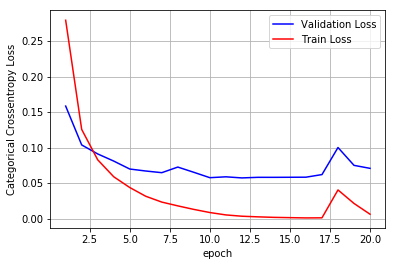

In [17]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

model_2 = Sequential()

model_2.add(Dense(712, activation='tanh', input_dim=784, kernel_initializer=he_normal( seed=None)))


model_2.add(Dense(360, activation='tanh', kernel_initializer=he_normal( seed=None))) 



model_2.add(Dense(10, activation='softmax'))


model_2.summary()

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, Y_train, batch_size=256, epochs=20, verbose=1, validation_data=(X_test, Y_test))


score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model_2.get_weights()
for i in range (0,len(w_after)):
  print(i,w_after[i].shape)

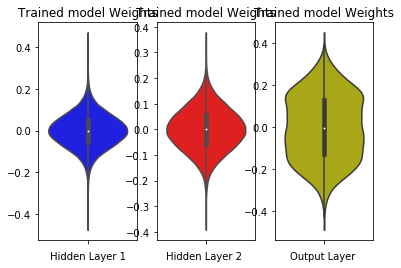

In [18]:
w_after = model_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3-Hidden Layers

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 720)               565200    
_________________________________________________________________
batch_normalization_5 (Batch (None, 720)               2880      
_________________________________________________________________
dropout_5 (Dropout)          (None, 720)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 540)               389340    
_________________________________________________________________
batch_normalization_6 (Batch (None, 540)               2160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 540)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 360)              

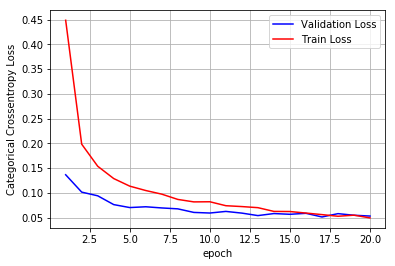

In [19]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

model_3 = Sequential()

model_3.add(Dense(720, activation='relu', input_dim=784, kernel_initializer=he_normal(seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(540, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(360, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(10, activation='softmax'))


model_3.summary()

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model_3.get_weights()
for i in range (0,len(w_after)):
  print(i,w_after[i].shape)


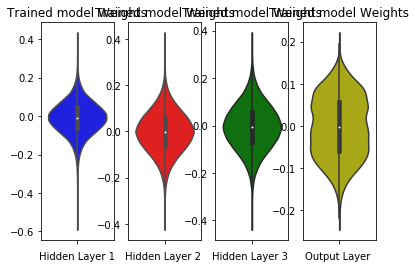

In [20]:
w_after = model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
h3_w = w_after[12].flatten().reshape(-1,1)
out_w = w_after[18].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 640)               502400    
_________________________________________________________________
batch_normalization_8 (Batch (None, 640)               2560      
_________________________________________________________________
dense_18 (Dense)             (None, 480)               307680    
_________________________________________________________________
batch_normalization_9 (Batch (None, 480)               1920      
_________________________________________________________________
dense_19 (Dense)             (None, 160)               76960     
_________________________________________________________________
batch_normalization_10 (Batc (None, 160)               640       
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

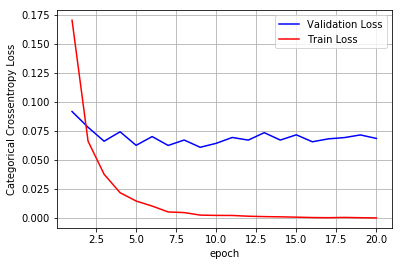

In [21]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

model_3 = Sequential()

model_3.add(Dense(640, activation='relu', input_dim=784, kernel_initializer=glorot_normal(seed=None)))
model_3.add(BatchNormalization())


model_3.add(Dense(480, activation='relu', kernel_initializer=glorot_normal(seed=None)) )
model_3.add(BatchNormalization())


model_3.add(Dense(160, activation='relu', kernel_initializer=glorot_normal(seed=None)) )
model_3.add(BatchNormalization())


model_3.add(Dense(10, activation='softmax'))


model_3.summary()

model_3.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model_3.get_weights()
for i in range (0,len(w_after)):
  print(i,w_after[i].shape)


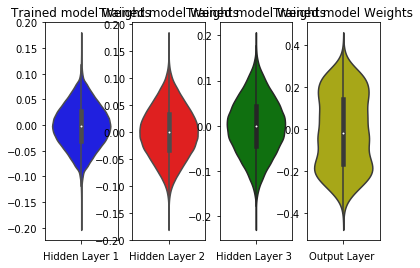

In [22]:
w_after = model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
h3_w = w_after[12].flatten().reshape(-1,1)
out_w = w_after[18].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 564)               442740    
_________________________________________________________________
dropout_8 (Dropout)          (None, 564)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 324)               183060    
_________________________________________________________________
dropout_9 (Dropout)          (None, 324)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 144)               46800     
_________________________________________________________________
dropout_10 (Dropout)         (None, 144)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)               

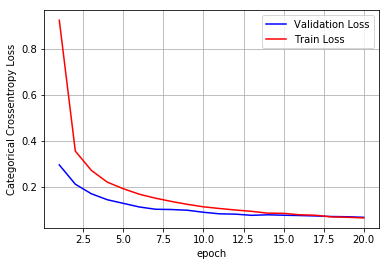

In [23]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

model_3 = Sequential()

model_3.add(Dense(564, activation='sigmoid', input_dim=784, kernel_initializer=he_normal(seed=None)))

model_3.add(Dropout(0.5))

model_3.add(Dense(324, activation='sigmoid', kernel_initializer=he_normal(seed=None)) )

model_3.add(Dropout(0.5))

model_3.add(Dense(144, activation='sigmoid', kernel_initializer=he_normal(seed=None)) )

model_3.add(Dropout(0.5))

model_3.add(Dense(10, activation='softmax'))


model_3.summary()

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model_3.get_weights()
for i in range (0,len(w_after)):
  print(i,w_after[i].shape)


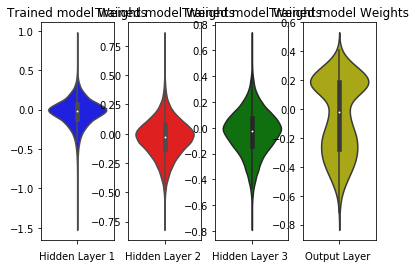

In [24]:
w_after = model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 480)               376800    
_________________________________________________________________
dense_26 (Dense)             (None, 360)               173160    
_________________________________________________________________
dense_27 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2410      
Total params: 639,010
Trainable params: 639,010
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2327 - acc: 0.9293 - val_loss: 0.1322 - val_acc: 0.9599
Epoch 2/20
60000/60000 [==============================] - 4

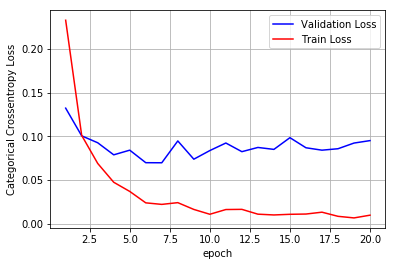

In [25]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

model_3 = Sequential()

model_3.add(Dense(480, activation='tanh', input_dim=784, kernel_initializer=he_normal(seed=None)))


model_3.add(Dense(360, activation='tanh', kernel_initializer=he_normal(seed=None)) )


model_3.add(Dense(240, activation='tanh', kernel_initializer=he_normal(seed=None)) )


model_3.add(Dense(10, activation='softmax'))


model_3.summary()

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

w_after = model_3.get_weights()
for i in range (0,len(w_after)):
  print(i,w_after[i].shape)


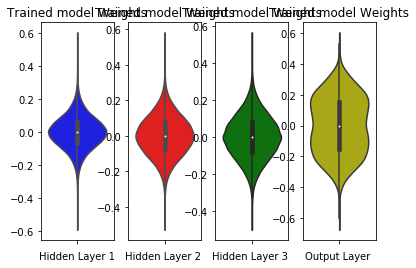

In [26]:
w_after = model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 5-Hidden Layers

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 720)               565200    
_________________________________________________________________
batch_normalization_11 (Batc (None, 720)               2880      
_________________________________________________________________
dropout_11 (Dropout)         (None, 720)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 540)               389340    
_________________________________________________________________
batch_normalization_12 (Batc (None, 540)               2160      
_________________________________________________________________
dropout_12 (Dropout)         (None, 540)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 360)              

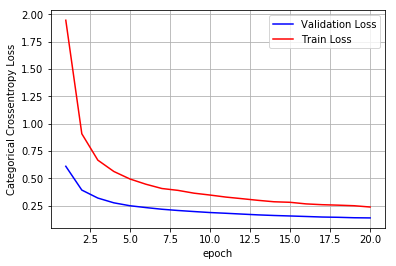

In [27]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

model_5 = Sequential()

model_5.add(Dense(720, activation='relu', input_dim=784, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(540, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(360, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(240, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)) )
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(120, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)) )
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(10, activation='softmax'))


model_5.summary()

model_5.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_5.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))




score = model_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


w_after = model_5.get_weights()
for i in range (0,len(w_after)):
  print(i,w_after[i].shape)

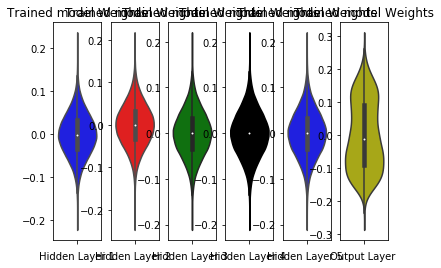

In [28]:
w_after = model_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
h3_w = w_after[12].flatten().reshape(-1,1)
h4_w = w_after[18].flatten().reshape(-1,1)
h5_w = w_after[24].flatten().reshape(-1,1)
out_w = w_after[30].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='0')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_16 (Batc (None, 600)               2400      
_________________________________________________________________
dense_36 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_17 (Batc (None, 500)               2000      
_________________________________________________________________
dense_37 (Dense)             (None, 400)               200400    
_________________________________________________________________
batch_normalization_18 (Batc (None, 400)               1600      
_________________________________________________________________
dense_38 (Dense)             (None, 300)             

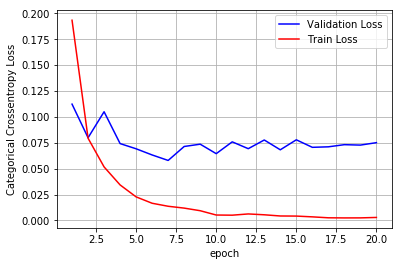

In [29]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

model_5 = Sequential()

model_5.add(Dense(600, activation='relu', input_dim=784, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model_5.add(BatchNormalization())


model_5.add(Dense(500, activation='relu', kernel_initializer=glorot_normal( seed=None)))
model_5.add(BatchNormalization())


model_5.add(Dense(400, activation='relu', kernel_initializer=glorot_normal( seed=None)))
model_5.add(BatchNormalization())


model_5.add(Dense(300, activation='relu', kernel_initializer=glorot_normal( seed=None)) )
model_5.add(BatchNormalization())


model_5.add(Dense(200, activation='relu', kernel_initializer=glorot_normal( seed=None)))
model_5.add(BatchNormalization())


model_5.add(Dense(10, activation='softmax'))


model_5.summary()

model_5.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_5.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))




score = model_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


w_after = model_5.get_weights()
for i in range (0,len(w_after)):
  print(i,w_after[i].shape)

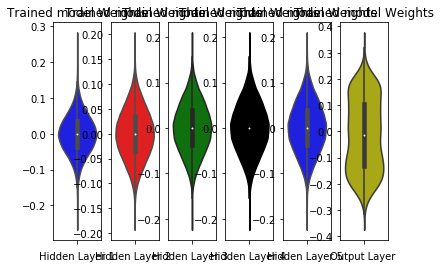

In [30]:
w_after = model_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
h3_w = w_after[12].flatten().reshape(-1,1)
h4_w = w_after[18].flatten().reshape(-1,1)
h5_w = w_after[24].flatten().reshape(-1,1)
out_w = w_after[30].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='0')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_16 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 400)               200400    
_________________________________________________________________
dropout_17 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_18 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 200)             

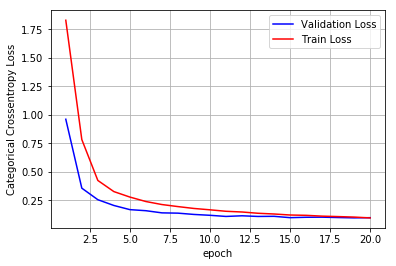

In [31]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

model_5 = Sequential()

model_5.add(Dense(500, activation='sigmoid', input_dim=784, kernel_initializer=glorot_normal( seed=None)))

model_5.add(Dropout(0.5))

model_5.add(Dense(400, activation='sigmoid',kernel_initializer=glorot_normal( seed=None)))

model_5.add(Dropout(0.5))

model_5.add(Dense(300, activation='sigmoid', kernel_initializer=glorot_normal( seed=None)))

model_5.add(Dropout(0.5))

model_5.add(Dense(200, activation='sigmoid', kernel_initializer=glorot_normal( seed=None)))

model_5.add(Dropout(0.5))

model_5.add(Dense(100, activation='sigmoid', kernel_initializer=glorot_normal( seed=None)))

model_5.add(Dropout(0.5))

model_5.add(Dense(10, activation='softmax'))


model_5.summary()

model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_5.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))




score = model_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


w_after = model_5.get_weights()
for i in range (0,len(w_after)):
  print(i,w_after[i].shape)

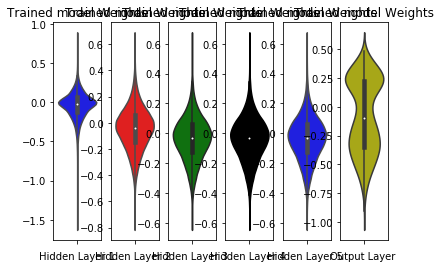

In [32]:
w_after = model_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='0')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 480)               376800    
_________________________________________________________________
dense_48 (Dense)             (None, 360)               173160    
_________________________________________________________________
dense_49 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_50 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_51 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_52 (Dense)             (None, 10)                610       
Total params: 673,390
Trainable params: 673,390
Non-trainable params: 0
_______________________________________________

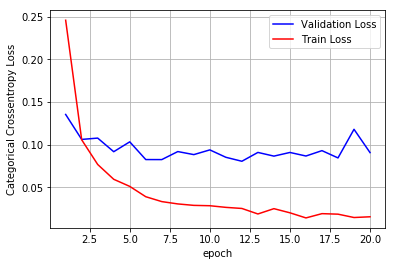

In [33]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

model_5 = Sequential()

model_5.add(Dense(480, activation='tanh', input_dim=784, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))


model_5.add(Dense(360, activation='tanh', kernel_initializer=he_normal(seed=None)))


model_5.add(Dense(240, activation='tanh', kernel_initializer=he_normal(seed=None)))


model_5.add(Dense(120, activation='tanh', kernel_initializer=he_normal(seed=None)))


model_5.add(Dense(60, activation='tanh', kernel_initializer=he_normal(seed=None)))


model_5.add(Dense(10, activation='softmax'))


model_5.summary()

model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_5.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))




score = model_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


w_after = model_5.get_weights()
for i in range (0,len(w_after)):
  print(i,w_after[i].shape)

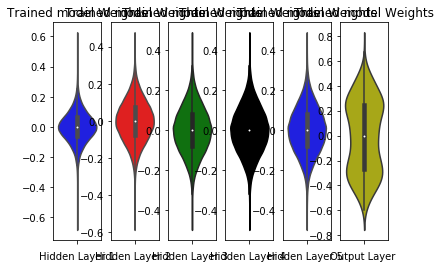

In [34]:
w_after = model_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='0')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

##Summary

In [35]:
#pretty table

from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["No of hidden layers","Batch_Normalization", "Activation_function", "optimizers", "weight_initialization","Architecture","Dropout_rate","Accuracy"]

x.add_row([2,"Y","Relu","sgd","Random Normal","464-184","Y",0.9614])
x.add_row([2,"Y","sigmoid","adadelta","Glorot Normal","660-240","N",0.9807])
x.add_row([2,"N","Relu","adam","He Normal","320-80","Y",0.98])
x.add_row([2,"N","tanh","adam","He Normal","712-360","N",0.9818])

x.add_row([3,"Y","Relu","sgd","Random Normal","720-540-360","Y",0.9842])
x.add_row([3,"Y","Relu","adadelta","Glorot Normal","640-480-160","N",0.9859])
x.add_row([3,"N","sigmoid","adam","He Normal","564-324-144","Y",0.981])
x.add_row([3,"N","tanh","adam","He Normal","480-360-240","N",0.9797])

x.add_row([5,"Y","Relu","sgd","Random Normal","720-540-360-240-120","Y",0.9588])
x.add_row([5,"Y","Relu","adadelta","Glorot Normal","600-500-400-300-200","N",0.9849])
x.add_row([5,"N","sigmoid","adam","Glorot Normal","500-400-300-200-100","Y",0.9783])
x.add_row([5,"N","tanh","adam","He Normal","480-360-240-120-60","N",0.9781])


print(x)

+---------------------+---------------------+---------------------+------------+-----------------------+---------------------+--------------+----------+
| No of hidden layers | Batch_Normalization | Activation_function | optimizers | weight_initialization |     Architecture    | Dropout_rate | Accuracy |
+---------------------+---------------------+---------------------+------------+-----------------------+---------------------+--------------+----------+
|          2          |          Y          |         Relu        |    sgd     |     Random Normal     |       464-184       |      Y       |  0.9614  |
|          2          |          Y          |       sigmoid       |  adadelta  |     Glorot Normal     |       660-240       |      N       |  0.9807  |
|          2          |          N          |         Relu        |    adam    |       He Normal       |        320-80       |      Y       |   0.98   |
|          2          |          N          |         tanh        |    adam    |  

## 3 hidden layers with relu activation and adadelta optimizers and glorot normal weight initialization would yield best accuracy rate of 0.9859